# Housing Prices Competition for Kaggle Learners
### Practice Notebook to submit

The competition is about predict the SalesPrices of Houses in the X_test dataset with a machine learning model with low Mean Squared Error as possible.

Ensure that the dataset is loaded to the notebook, adding data in the right tag. Search by "Housing Prices..." in the competition datasets, and load it.

<div>
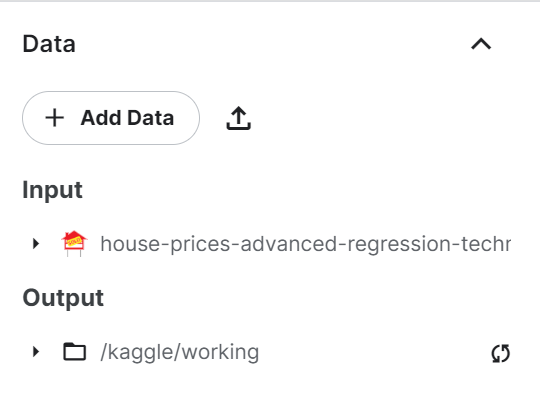
</div>


### Modules
Import the needed libraries for the model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

### Preprocess the data
Handling data and spliting the dataset

In [2]:
# Read the data
X_full = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y,
                                                                train_size=0.85, test_size=0.15,
                                                                random_state=1)

# Select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

### Visualize the data
A view of how thw data is ordered in the data set, seeing the columns and values that are available

In [3]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
76,180,21.0,1596,4,5,1973,1973,0.0,462,0,...,0,0,0,1,0,0,0,0,1,0
1183,60,160.0,15623,10,5,1996,1996,0.0,2096,0,...,0,0,0,1,1,0,0,0,0,0
463,20,60.0,8281,5,5,1965,1965,0.0,553,311,...,0,0,0,1,0,0,0,0,1,0
756,160,34.0,3230,6,5,1999,1999,894.0,381,0,...,0,0,0,1,0,0,0,0,1,0
1356,80,102.0,10192,7,6,1968,1992,143.0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Perform the score with an Extreme Gradient Boosting model
This update use a new model that optimize the loss by gradient descent method

In [4]:
# Define the model
my_model = XGBRegressor(n_estimators=650, learning_rate=0.02)

# Fit the model
my_model.fit(X_train, y_train)

# Get predictions
predictions = my_model.predict(X_valid)

# Calculate MAE
mae = mean_absolute_error(predictions, y_valid)
print("Mean Absolute Error:" , mae)

#best record: 13677.07

Mean Absolute Error: 13677.075413812785


### Generate Predictions with the X_test dataset
we will generate the columns target with predictions of the model

In [5]:
preds_test = my_model.predict(X_test)
preds_test

array([121663.61, 155713.7 , 184359.81, ..., 164016.39, 115508.61,
       220752.1 ], dtype=float32)

### Output file to submit
When I have the lowest score that I can find, we define the model as well and train the final model, and summit the predictions to the competition.

In [6]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)